In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

Column names: ['Target_Return', 'Daily_Mean_Return', 'Daily_SD']

First few rows:
   Target_Return  Daily_Mean_Return  Daily_SD
0            0.0           0.144406  3.446680
1            0.5           0.200316  3.834052
2            1.0           0.217053  5.342140
3            1.5           0.249446  7.273346
4            2.0           0.271728  9.375388


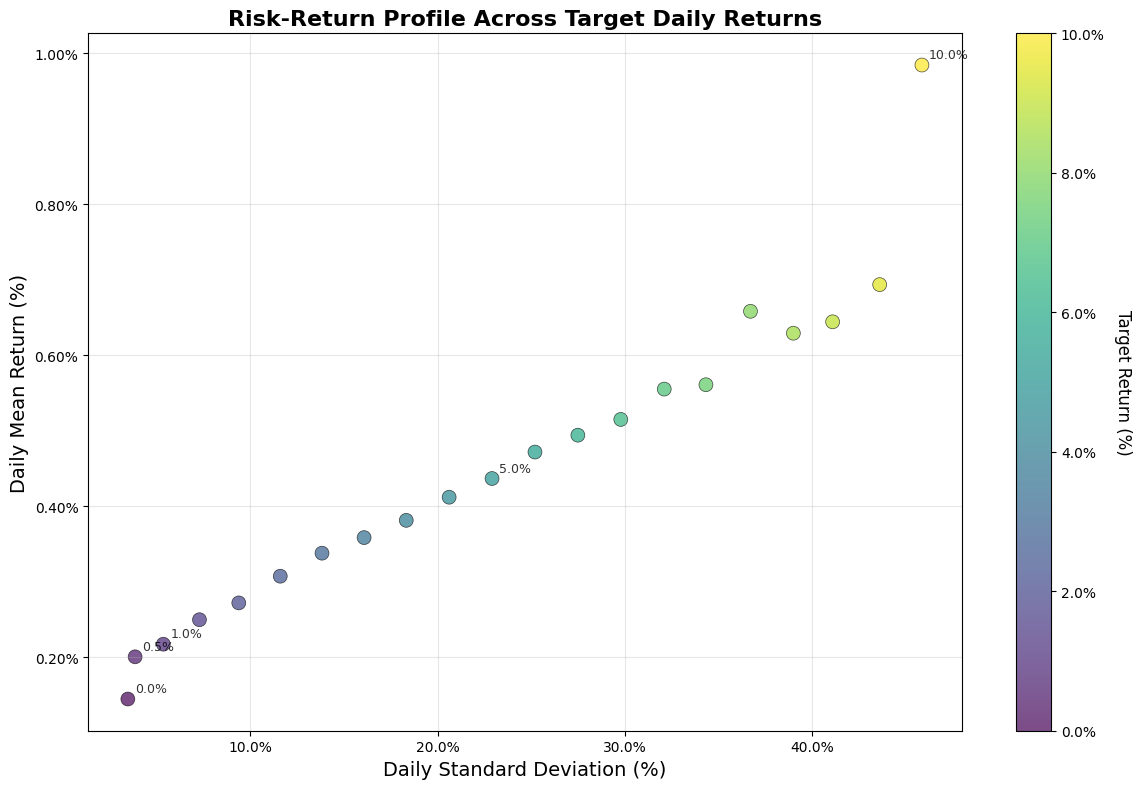

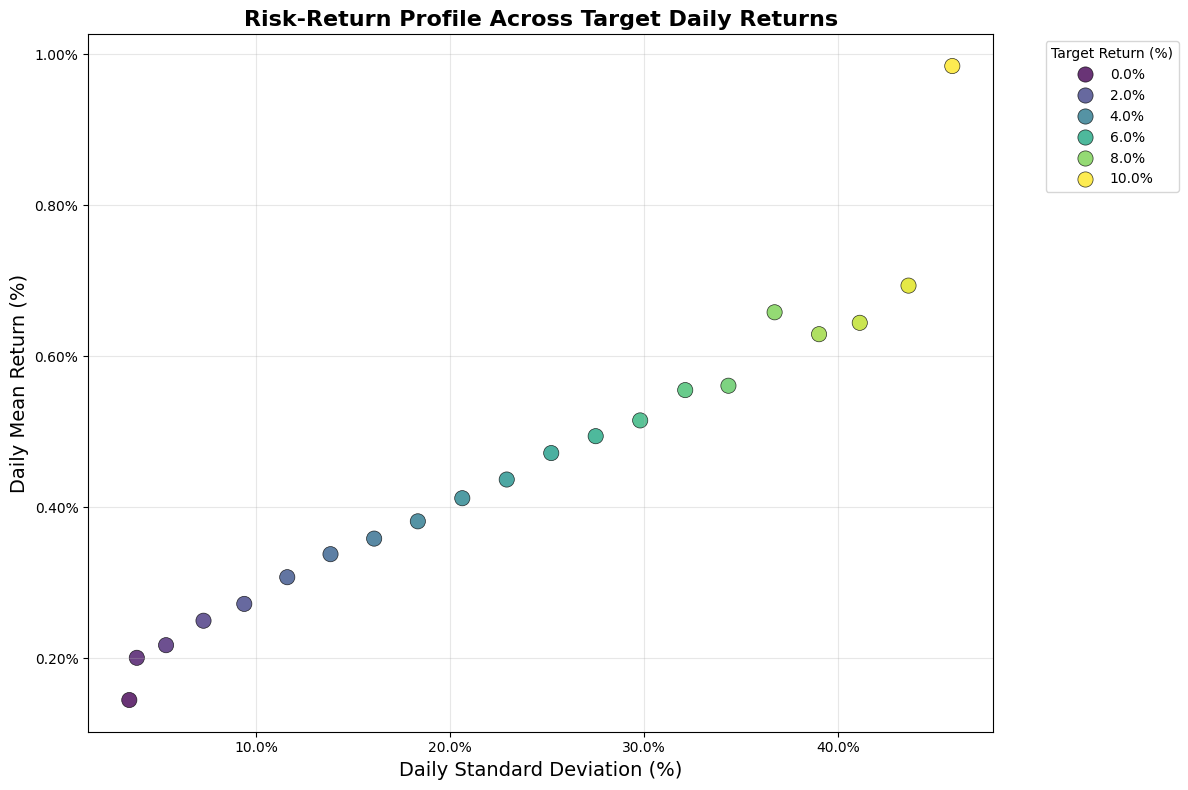


Summary Statistics:
    Target_Return (%)  Daily_Mean_Return (%)  Daily_Std_Dev (%)  Sharpe_Ratio
0                 0.0                 0.1444             3.4467        0.0419
1                 0.5                 0.2003             3.8341        0.0522
2                 1.0                 0.2171             5.3421        0.0406
3                 1.5                 0.2494             7.2733        0.0343
4                 2.0                 0.2717             9.3754        0.0290
5                 2.5                 0.3071            11.5913        0.0265
6                 3.0                 0.3376            13.8218        0.0244
7                 3.5                 0.3582            16.0727        0.0223
8                 4.0                 0.3811            18.3252        0.0208
9                 4.5                 0.4117            20.6172        0.0200
10                5.0                 0.4365            22.9096        0.0190
11                5.5                 0.471

In [10]:
# Load the Excel file
df = pd.read_excel('return_sd.xlsx')

# If you need to specify the sheet name:
# df = pd.read_excel('return_sd.xlsx', sheet_name='Sheet1')

# Print column names to verify data structure
print("Column names:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

# NOTE: Data Format Considerations
# If your data is already in percentage format (e.g., 1.5 for 1.5%), use it directly
# If your data is in decimal format (e.g., 0.015 for 1.5%), uncomment the conversion lines below

# Assuming your columns are named something like:
# 'Target_Return', 'Daily_Mean_Return', 'Daily_SD', etc.
# Adjust these column names based on your actual data

# Extract the relevant columns (adjust column names as needed)
target_returns = df['Target_Return']  # Replace with actual column name
daily_mean_returns = df['Daily_Mean_Return']  # Replace with actual column name  
daily_std_dev = df['Daily_SD']  # Replace with actual column name

# Data format handling:
# If your data is in decimal format (0.01 = 1%), uncomment these lines:
# target_returns = target_returns * 100
# daily_mean_returns = daily_mean_returns * 100
# daily_std_dev = daily_std_dev * 100

# If your data is already in percentage format (1.0 = 1%), use as is

# Create the scatter plot with color scale
plt.figure(figsize=(12, 8))

# Create scatter plot with color mapping
scatter = plt.scatter(daily_std_dev, daily_mean_returns, 
                     c=target_returns, 
                     cmap='viridis',  # You can change colormap: 'plasma', 'coolwarm', 'RdYlBu', etc.
                     s=100,  # Size of dots
                     alpha=0.7,  # Transparency
                     edgecolors='black',  # Black border around dots
                     linewidth=0.5)

# Add colorbar with percentage formatting
cbar = plt.colorbar(scatter)
cbar.set_label('Target Return (%)', rotation=270, labelpad=20, fontsize=12)
# Format colorbar ticks as regular numbers (since they represent percentages)
cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}%'))

# Format axes as percentages
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}%'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.2f}%'))

# Customize the plot
plt.xlabel('Daily Standard Deviation (%)', fontsize=14)
plt.ylabel('Daily Mean Return (%)', fontsize=14)
plt.title('Risk-Return Profile Across Target Daily Returns', fontsize=16, fontweight='bold')

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add annotations for specific points (optional)
# You can annotate key points like the best Sharpe ratio
for i, txt in enumerate(target_returns):
    if txt in [0.0, 0.5, 1.0, 5.0, 10.0]:  # Annotate selected points
        plt.annotate(f'{txt:.1f}%', 
                    (daily_std_dev[i], daily_mean_returns[i]),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=9, alpha=0.8)

# Adjust layout and show
plt.tight_layout()
plt.show()

# Alternative version with Seaborn (more polished look)
plt.figure(figsize=(12, 8))

# Using seaborn scatterplot
sns.scatterplot(data=df, 
                x='Daily_SD',  # Replace with your column name
                y='Daily_Mean_Return',  # Replace with your column name
                hue='Target_Return',  # Replace with your column name
                palette='viridis',
                s=120,
                alpha=0.8,
                edgecolor='black',
                linewidth=0.5)

# Format axes as percentages
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}%'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.2f}%'))

plt.xlabel('Daily Standard Deviation (%)', fontsize=14)
plt.ylabel('Daily Mean Return (%)', fontsize=14)
plt.title('Risk-Return Profile Across Target Daily Returns', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

# Customize legend with percentage formatting
legend = plt.legend(title='Target Return (%)', bbox_to_anchor=(1.05, 1), loc='upper left')
# Format legend labels as percentages
try:
    legend_labels = [f'{float(t.get_text()):.1f}%' for t in legend.get_texts()]
    for t, label in zip(legend.get_texts(), legend_labels):
        t.set_text(label)
except:
    pass  # Keep original labels if formatting fails

plt.tight_layout()
plt.show()

# Summary statistics table with percentage formatting
print("\nSummary Statistics:")
summary_df = pd.DataFrame({
    'Target_Return (%)': target_returns,
    'Daily_Mean_Return (%)': daily_mean_returns,
    'Daily_Std_Dev (%)': daily_std_dev,
    'Sharpe_Ratio': (daily_mean_returns - 0.02/252) / daily_std_dev  # Assuming 2% risk-free rate
})

print(summary_df.round(4))

# If you want to format the percentage columns in the display:
print("\nFormatted Summary:")
formatted_df = summary_df.copy()
formatted_df['Target_Return (%)'] = formatted_df['Target_Return (%)'].map('{:.1f}%'.format)
formatted_df['Daily_Mean_Return (%)'] = formatted_df['Daily_Mean_Return (%)'].map('{:.3f}%'.format)
formatted_df['Daily_Std_Dev (%)'] = formatted_df['Daily_Std_Dev (%)'].map('{:.2f}%'.format)
formatted_df['Sharpe_Ratio'] = formatted_df['Sharpe_Ratio'].map('{:.4f}'.format)
print(formatted_df)

Column names: ['Target_Return', 'Daily_Mean_Return', 'Daily_SD']

First few rows:
   Target_Return  Daily_Mean_Return  Daily_SD
0            0.0           0.144406  3.446680
1            0.5           0.200316  3.834052
2            1.0           0.217053  5.342140
3            1.5           0.249446  7.273346
4            2.0           0.271728  9.375388


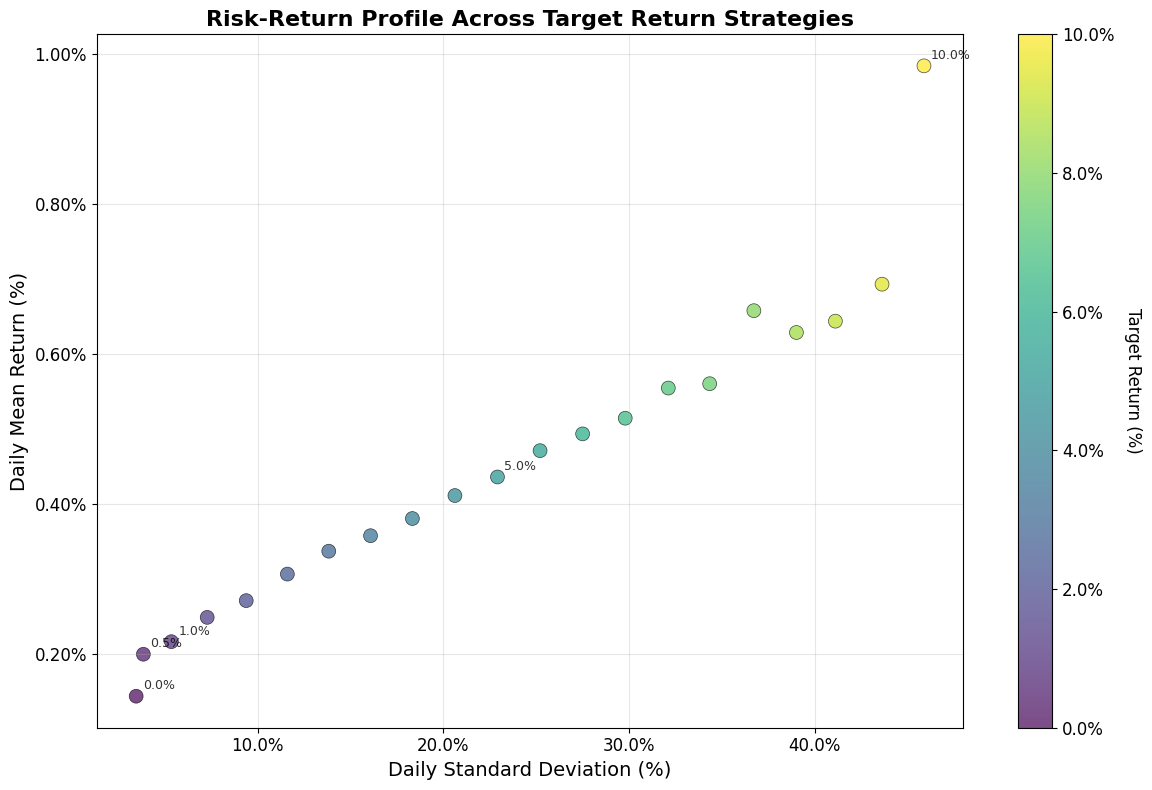

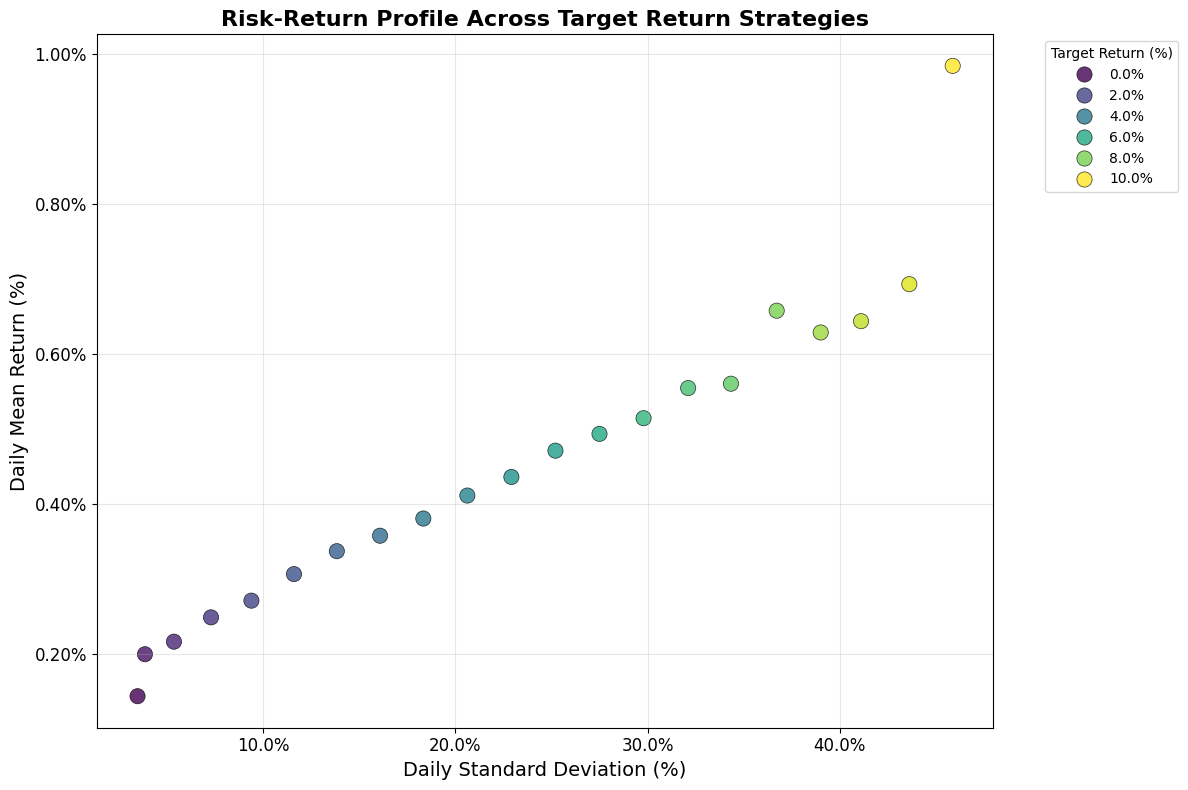


Summary Statistics:
    Target_Return (%)  Daily_Mean_Return (%)  Daily_Std_Dev (%)  Sharpe_Ratio
0                 0.0                 0.1444             3.4467        0.0419
1                 0.5                 0.2003             3.8341        0.0522
2                 1.0                 0.2171             5.3421        0.0406
3                 1.5                 0.2494             7.2733        0.0343
4                 2.0                 0.2717             9.3754        0.0290
5                 2.5                 0.3071            11.5913        0.0265
6                 3.0                 0.3376            13.8218        0.0244
7                 3.5                 0.3582            16.0727        0.0223
8                 4.0                 0.3811            18.3252        0.0208
9                 4.5                 0.4117            20.6172        0.0200
10                5.0                 0.4365            22.9096        0.0190
11                5.5                 0.471

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import PercentFormatter

# Load the Excel file
df = pd.read_excel('return_sd.xlsx')

# If you need to specify the sheet name:
# df = pd.read_excel('return_sd.xlsx', sheet_name='Sheet1')

# Print column names to verify data structure
print("Column names:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

# NOTE: Data Format Considerations
# If your data is already in percentage format (e.g., 1.5 for 1.5%), use it directly
# If your data is in decimal format (e.g., 0.015 for 1.5%), uncomment the conversion lines below

# Assuming your columns are named something like:
# 'Target_Return', 'Daily_Mean_Return', 'Daily_SD', etc.
# Adjust these column names based on your actual data

# Extract the relevant columns (adjust column names as needed)
target_returns = df['Target_Return']  # Replace with actual column name
daily_mean_returns = df['Daily_Mean_Return']  # Replace with actual column name  
daily_std_dev = df['Daily_SD']  # Replace with actual column name

# Data format handling:
# If your data is in decimal format (0.01 = 1%), uncomment these lines:
# target_returns = target_returns * 100
# daily_mean_returns = daily_mean_returns * 100
# daily_std_dev = daily_std_dev * 100

# If your data is already in percentage format (1.0 = 1%), use as is

# Create the scatter plot with color scale
plt.figure(figsize=(12, 8))

# Create scatter plot with color mapping
scatter = plt.scatter(daily_std_dev, daily_mean_returns, 
                     c=target_returns, 
                     cmap='viridis',  # You can change colormap: 'plasma', 'coolwarm', 'RdYlBu', etc.
                     s=100,  # Size of dots
                     alpha=0.7,  # Transparency
                     edgecolors='black',  # Black border around dots
                     linewidth=0.5)

# Add colorbar with percentage formatting
cbar = plt.colorbar(scatter)
cbar.set_label('Target Return (%)', rotation=270, labelpad=20, fontsize=12)
# Format colorbar ticks as regular numbers (since they represent percentages)
cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}%'))
# Increase colorbar tick label font size
cbar.ax.tick_params(labelsize=12)  # Options: 10, 12, 14, 16, etc.

# Format axes as percentages
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}%'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.2f}%'))

# Increase font size of axis tick labels
plt.tick_params(axis='both', which='major', labelsize=12)  # Options: 10, 12, 14, 16, etc.
# Alternatively, you can set x and y axis separately:
# plt.tick_params(axis='x', which='major', labelsize=12)
# plt.tick_params(axis='y', which='major', labelsize=12)

# Customize the plot
plt.xlabel('Daily Standard Deviation (%)', fontsize=14)
plt.ylabel('Daily Mean Return (%)', fontsize=14)
plt.title('Risk-Return Profile Across Target Return Strategies', fontsize=16, fontweight='bold')

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add annotations for specific points (optional)
# You can annotate key points like the best Sharpe ratio
for i, txt in enumerate(target_returns):
    if txt in [0.0, 0.5, 1.0, 5.0, 10.0]:  # Annotate selected points
        plt.annotate(f'{txt:.1f}%', 
                    (daily_std_dev[i], daily_mean_returns[i]),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=9, alpha=0.8)

# Adjust layout and show
plt.tight_layout()
plt.show()

# Alternative version with Seaborn (more polished look)
plt.figure(figsize=(12, 8))

# Using seaborn scatterplot
sns.scatterplot(data=df, 
                x='Daily_SD',  # Replace with your column name
                y='Daily_Mean_Return',  # Replace with your column name
                hue='Target_Return',  # Replace with your column name
                palette='viridis',
                s=120,
                alpha=0.8,
                edgecolor='black',
                linewidth=0.5)

# Format axes as percentages
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}%'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.2f}%'))

# Increase font size of axis tick labels
plt.tick_params(axis='both', which='major', labelsize=12)  # Options: 10, 12, 14, 16, etc.

plt.xlabel('Daily Standard Deviation (%)', fontsize=14)
plt.ylabel('Daily Mean Return (%)', fontsize=14)
plt.title('Risk-Return Profile Across Target Return Strategies', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

# Customize legend with percentage formatting
legend = plt.legend(title='Target Return (%)', bbox_to_anchor=(1.05, 1), loc='upper left')
# Format legend labels as percentages
try:
    legend_labels = [f'{float(t.get_text()):.1f}%' for t in legend.get_texts()]
    for t, label in zip(legend.get_texts(), legend_labels):
        t.set_text(label)
except:
    pass  # Keep original labels if formatting fails

plt.tight_layout()
plt.show()

# Summary statistics table with percentage formatting
print("\nSummary Statistics:")
summary_df = pd.DataFrame({
    'Target_Return (%)': target_returns,
    'Daily_Mean_Return (%)': daily_mean_returns,
    'Daily_Std_Dev (%)': daily_std_dev,
    'Sharpe_Ratio': (daily_mean_returns - 0.02/252) / daily_std_dev  # Assuming 2% risk-free rate
})

print(summary_df.round(4))

# If you want to format the percentage columns in the display:
print("\nFormatted Summary:")
formatted_df = summary_df.copy()
formatted_df['Target_Return (%)'] = formatted_df['Target_Return (%)'].map('{:.1f}%'.format)
formatted_df['Daily_Mean_Return (%)'] = formatted_df['Daily_Mean_Return (%)'].map('{:.3f}%'.format)
formatted_df['Daily_Std_Dev (%)'] = formatted_df['Daily_Std_Dev (%)'].map('{:.2f}%'.format)
formatted_df['Sharpe_Ratio'] = formatted_df['Sharpe_Ratio'].map('{:.4f}'.format)
print(formatted_df)

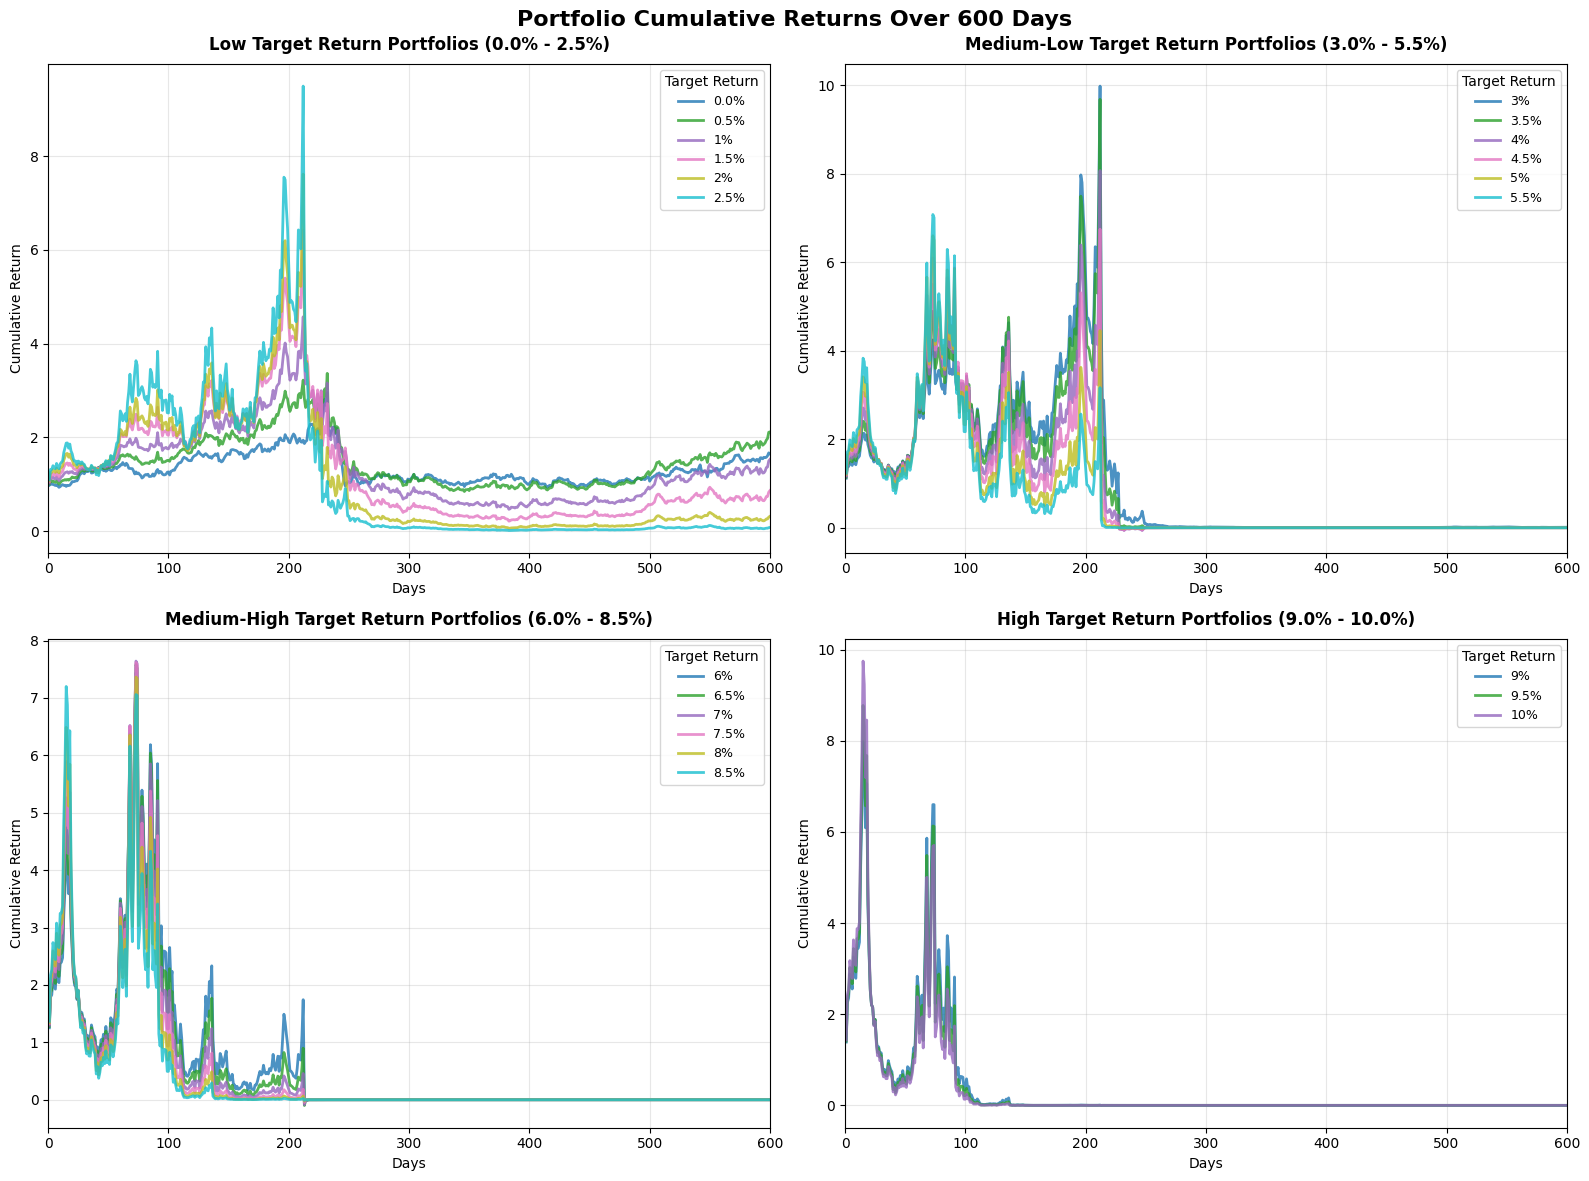

Portfolio Analysis Summary:
Total portfolios: 21
Days analyzed: 600
Target return range: 0.0% to 10.0%

Final Cumulative Returns (Day 600):
0.0%: 1.6480
0.5%: 2.1173
1%: 1.5292
1.5%: 0.8643
2%: 0.3166
2.5%: 0.0794
3%: 0.0108
3.5%: 0.0003
4%: -0.0001
4.5%: -0.0000
5%: 0.0000
5.5%: 0.0000
6%: -0.0000
6.5%: -0.0000
7%: -0.0000
7.5%: 0.0000
8%: 0.0000
8.5%: 0.0000
9%: 0.0000
9.5%: 0.0000
10%: -0.0000


<Figure size 640x480 with 0 Axes>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
df = pd.read_excel('Port Cum Return.xlsx', sheet_name='Sheet1')

# Create day index (1 to 600)
days = np.arange(1, 601)

# Set up the figure with 4 subplots (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Portfolio Cumulative Returns Over 600 Days', fontsize=16, fontweight='bold')

# Flatten axes for easier indexing
axes = axes.flatten()

# Define colors for better visualization
colors = plt.cm.tab10(np.linspace(0, 1, 6))

# Portfolio groupings (6, 6, 6, 3)
portfolio_groups = [
    list(range(0, 6)),    # Portfolios 0-5 (0.0% to 2.5% TR)
    list(range(6, 12)),   # Portfolios 6-11 (3.0% to 5.5% TR)
    list(range(12, 18)),  # Portfolios 12-17 (6.0% to 8.5% TR)
    list(range(18, 21))   # Portfolios 18-20 (9.0% to 10.0% TR)
]

subplot_titles = [
    'Low Target Return Portfolios (0.0% - 2.5%)',
    'Medium-Low Target Return Portfolios (3.0% - 5.5%)',
    'Medium-High Target Return Portfolios (6.0% - 8.5%)',
    'High Target Return Portfolios (9.0% - 10.0%)'
]

# Plot each group
for i, (group, title) in enumerate(zip(portfolio_groups, subplot_titles)):
    ax = axes[i]
    
    for j, portfolio_idx in enumerate(group):
        # Get portfolio name and data
        portfolio_name = df.columns[portfolio_idx]
        portfolio_data = df.iloc[:, portfolio_idx].values
        
        # Extract target return percentage for legend
        tr_percent = portfolio_name.split()[1]
        
        # Plot the cumulative return
        color = colors[j % len(colors)]
        ax.plot(days, portfolio_data, label=f'{tr_percent}', 
                color=color, linewidth=2, alpha=0.8)
    
    # Customize subplot
    ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('Days', fontsize=10)
    ax.set_ylabel('Cumulative Return', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.legend(title='Target Return', loc='best', fontsize=9)
    
    # Set consistent y-axis limits for better comparison
    ax.set_xlim(0, 600)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Optional: Save the figure
plt.savefig('portfolio_cumulative_returns.png', dpi=300, bbox_inches='tight')

# Alternative: Save as PDF
# plt.savefig('portfolio_cumulative_returns.pdf', bbox_inches='tight')

print("Portfolio Analysis Summary:")
print(f"Total portfolios: {len(df.columns)}")
print(f"Days analyzed: {len(df)}")
print(f"Target return range: 0.0% to 10.0%")

# Display final values for each portfolio
print("\nFinal Cumulative Returns (Day 600):")
for i, col in enumerate(df.columns):
    final_return = df.iloc[-1, i]
    tr_percent = col.split()[1]
    print(f"{tr_percent}: {final_return:.4f}")

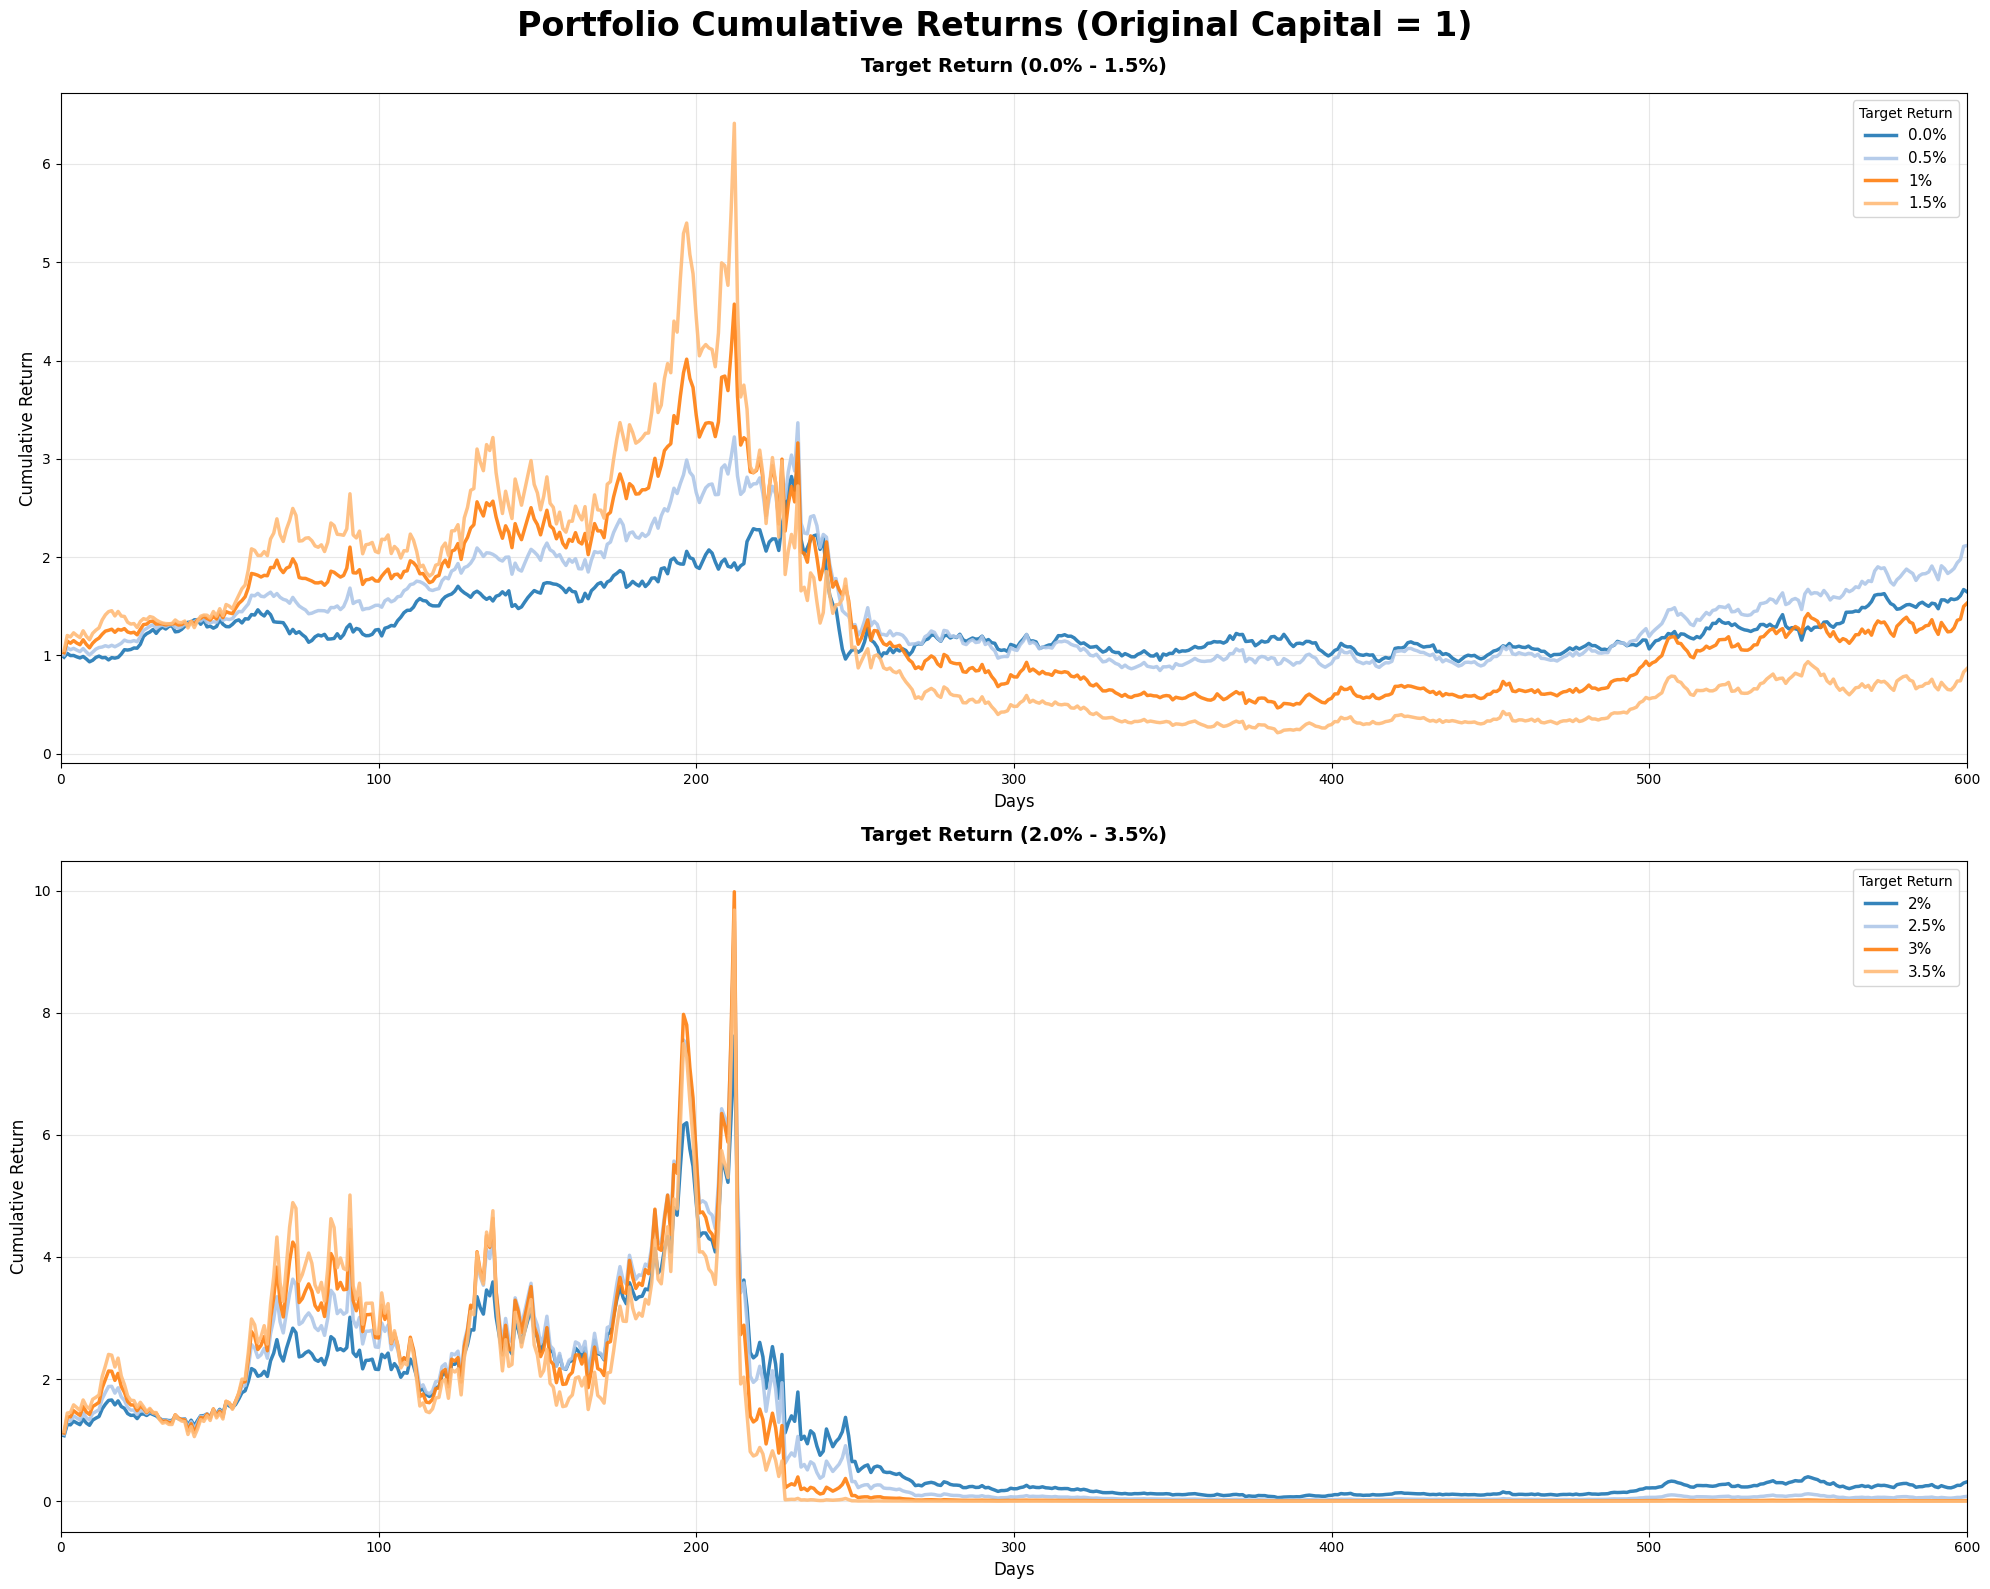

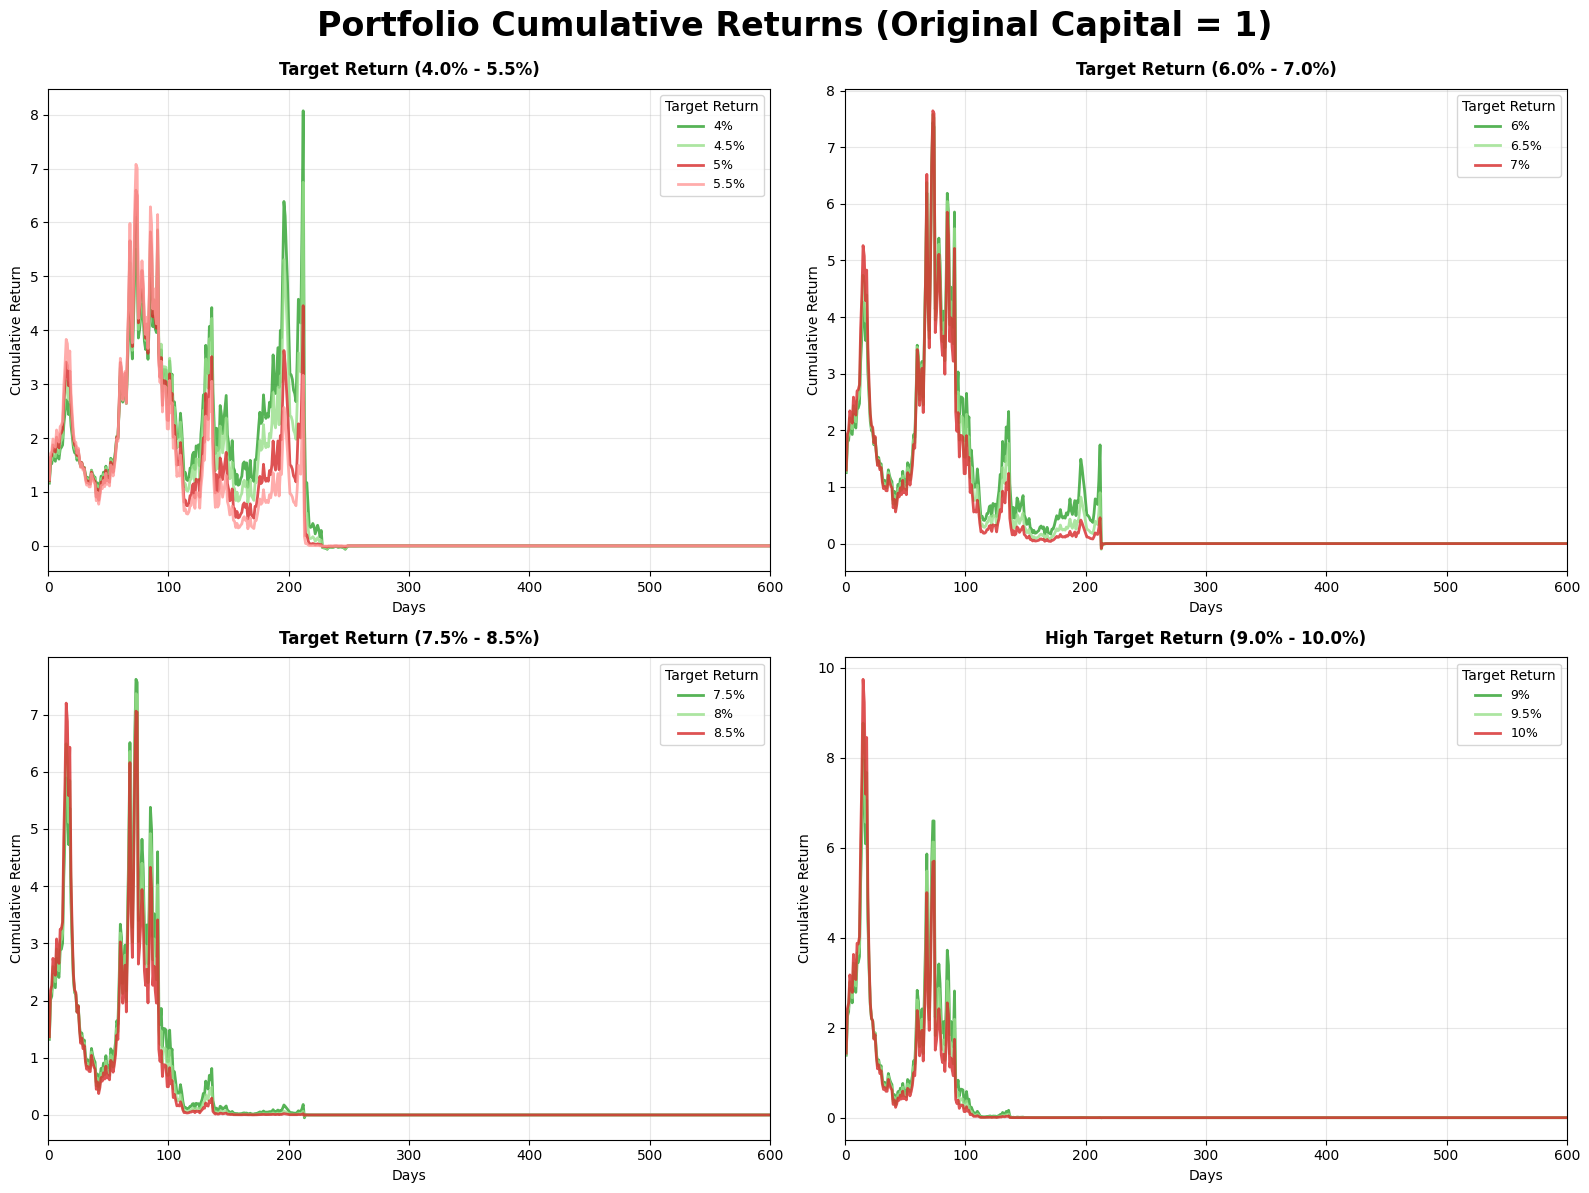

Portfolio Analysis Summary:
Total portfolios: 21
Days analyzed: 600
Target return range: 0.0% to 10.0%

Diagram 1 (4 lines x 2 plots):
- Plot 1: 0.0%, 0.5%, 1.0%, 1.5% TR
- Plot 2: 2.0%, 2.5%, 3.0%, 3.5% TR

Diagram 2 (3-4 lines x 4 plots):
- Plot 1: 4.0%, 4.5%, 5.0%, 5.5% TR (4 lines)
- Plot 2: 6.0%, 6.5%, 7.0% TR (3 lines)
- Plot 3: 7.5%, 8.0%, 8.5% TR (3 lines)
- Plot 4: 9.0%, 9.5%, 10.0% TR (3 lines)

Final Cumulative Returns (Day 600):
0.0%: 1.6480
0.5%: 2.1173
1%: 1.5292
1.5%: 0.8643
2%: 0.3166
2.5%: 0.0794
3%: 0.0108
3.5%: 0.0003
4%: -0.0001
4.5%: -0.0000
5%: 0.0000
5.5%: 0.0000
6%: -0.0000
6.5%: -0.0000
7%: -0.0000
7.5%: 0.0000
8%: 0.0000
8.5%: 0.0000
9%: 0.0000
9.5%: 0.0000
10%: -0.0000


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
df = pd.read_excel('Port Cum Return.xlsx', sheet_name='Sheet1')

# Create day index (1 to 600)
days = np.arange(1, 601)

# Define colors for better visualization
colors = plt.cm.tab20(np.linspace(0, 1, 20))

# ========================================
# FIRST DIAGRAM: 4 lines x 2 plots (larger)
# ========================================

fig1, axes1 = plt.subplots(2, 1, figsize=(20, 16))
fig1.suptitle('Portfolio Cumulative Returns (Original Capital = 1)', fontsize = 24, fontweight='bold',y=0.99)

# First diagram portfolio groupings (4 portfolios per plot)
group1_portfolios = [
    list(range(0, 4)),    # Portfolios 0-3 (0.0% to 1.5% TR)
    list(range(4, 8))     # Portfolios 4-7 (2.0% to 3.5% TR)
]

group1_titles = [
    'Target Return (0.0% - 1.5%)',
    'Target Return (2.0% - 3.5%)'
]

# Plot first diagram
for i, (group, title) in enumerate(zip(group1_portfolios, group1_titles)):
    ax = axes1[i]
    
    for j, portfolio_idx in enumerate(group):
        # Get portfolio name and data
        portfolio_name = df.columns[portfolio_idx]
        portfolio_data = df.iloc[:, portfolio_idx].values
        
        # Extract target return percentage for legend
        tr_percent = portfolio_name.split()[1]
        
        # Plot the cumulative return
        color = colors[j]
        ax.plot(days, portfolio_data, label=f'{tr_percent}', 
                color=color, linewidth=2.5, alpha=0.9)
    
    # Customize subplot
    ax.set_title(title, fontsize=14, fontweight='bold', pad=15)
    ax.set_xlabel('Days', fontsize=12)
    ax.set_ylabel('Cumulative Return', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(title='Target Return', loc='best', fontsize=11)
    ax.set_xlim(0, 600)

plt.tight_layout()
plt.show()

# ========================================
# SECOND DIAGRAM: 3-4 lines x 4 plots (smaller)
# ========================================

fig2, axes2 = plt.subplots(2, 2, figsize=(16, 12))
fig2.suptitle('Portfolio Cumulative Returns (Original Capital = 1)', fontsize=24, fontweight='bold',y=0.99)

# Flatten axes for easier indexing
axes2 = axes2.flatten()

# Second diagram portfolio groupings (remaining 13 portfolios: 4,3,3,3)
group2_portfolios = [
    list(range(8, 12)),   # Portfolios 8-11 (4.0% to 5.5% TR)
    list(range(12, 15)),  # Portfolios 12-14 (6.0% to 7.0% TR)
    list(range(15, 18)),  # Portfolios 15-17 (7.5% to 8.5% TR)
    list(range(18, 21))   # Portfolios 18-20 (9.0% to 10.0% TR)
]

group2_titles = [
    'Target Return (4.0% - 5.5%)',
    'Target Return (6.0% - 7.0%)',
    'Target Return (7.5% - 8.5%)',
    'High Target Return (9.0% - 10.0%)'
]

# Plot second diagram
for i, (group, title) in enumerate(zip(group2_portfolios, group2_titles)):
    ax = axes2[i]
    
    for j, portfolio_idx in enumerate(group):
        # Get portfolio name and data
        portfolio_name = df.columns[portfolio_idx]
        portfolio_data = df.iloc[:, portfolio_idx].values
        
        # Extract target return percentage for legend
        tr_percent = portfolio_name.split()[1]
        
        # Plot the cumulative return
        color = colors[j + 4]  # Offset colors to avoid repetition
        ax.plot(days, portfolio_data, label=f'{tr_percent}', 
                color=color, linewidth=2, alpha=0.8)
    
    # Customize subplot
    ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('Days', fontsize=10)
    ax.set_ylabel('Cumulative Return', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.legend(title='Target Return', loc='best', fontsize=9)
    ax.set_xlim(0, 600)

plt.tight_layout()
plt.show()

# Optional: Save both figures
fig1.savefig('portfolio_returns_diagram1.png', dpi=300, bbox_inches='tight')
fig2.savefig('portfolio_returns_diagram2.png', dpi=300, bbox_inches='tight')

print("Portfolio Analysis Summary:")
print(f"Total portfolios: {len(df.columns)}")
print(f"Days analyzed: {len(df)}")
print(f"Target return range: 0.0% to 10.0%")

print("\nDiagram 1 (4 lines x 2 plots):")
print("- Plot 1: 0.0%, 0.5%, 1.0%, 1.5% TR")
print("- Plot 2: 2.0%, 2.5%, 3.0%, 3.5% TR")

print("\nDiagram 2 (3-4 lines x 4 plots):")
print("- Plot 1: 4.0%, 4.5%, 5.0%, 5.5% TR (4 lines)")
print("- Plot 2: 6.0%, 6.5%, 7.0% TR (3 lines)")
print("- Plot 3: 7.5%, 8.0%, 8.5% TR (3 lines)")
print("- Plot 4: 9.0%, 9.5%, 10.0% TR (3 lines)")

# Display final values for each portfolio
print("\nFinal Cumulative Returns (Day 600):")
for i, col in enumerate(df.columns):
    final_return = df.iloc[-1, i]
    tr_percent = col.split()[1]
    print(f"{tr_percent}: {final_return:.4f}")

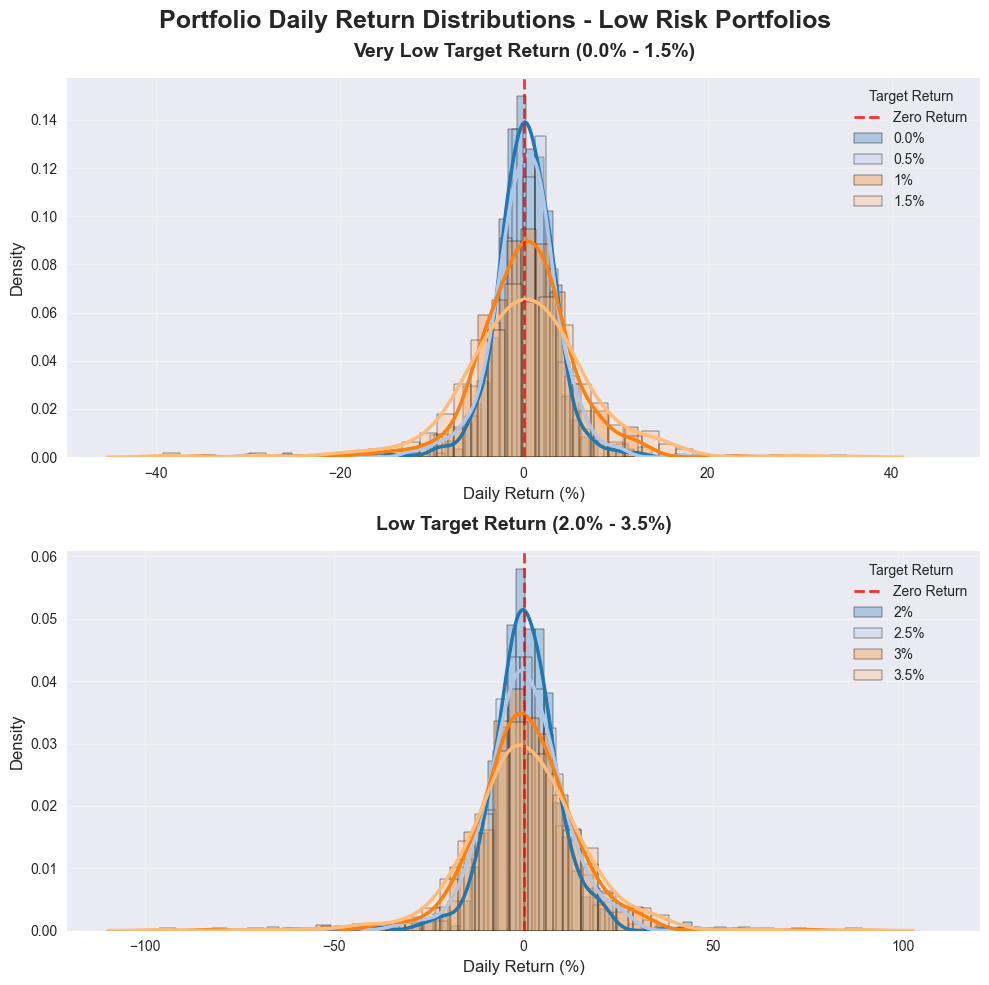

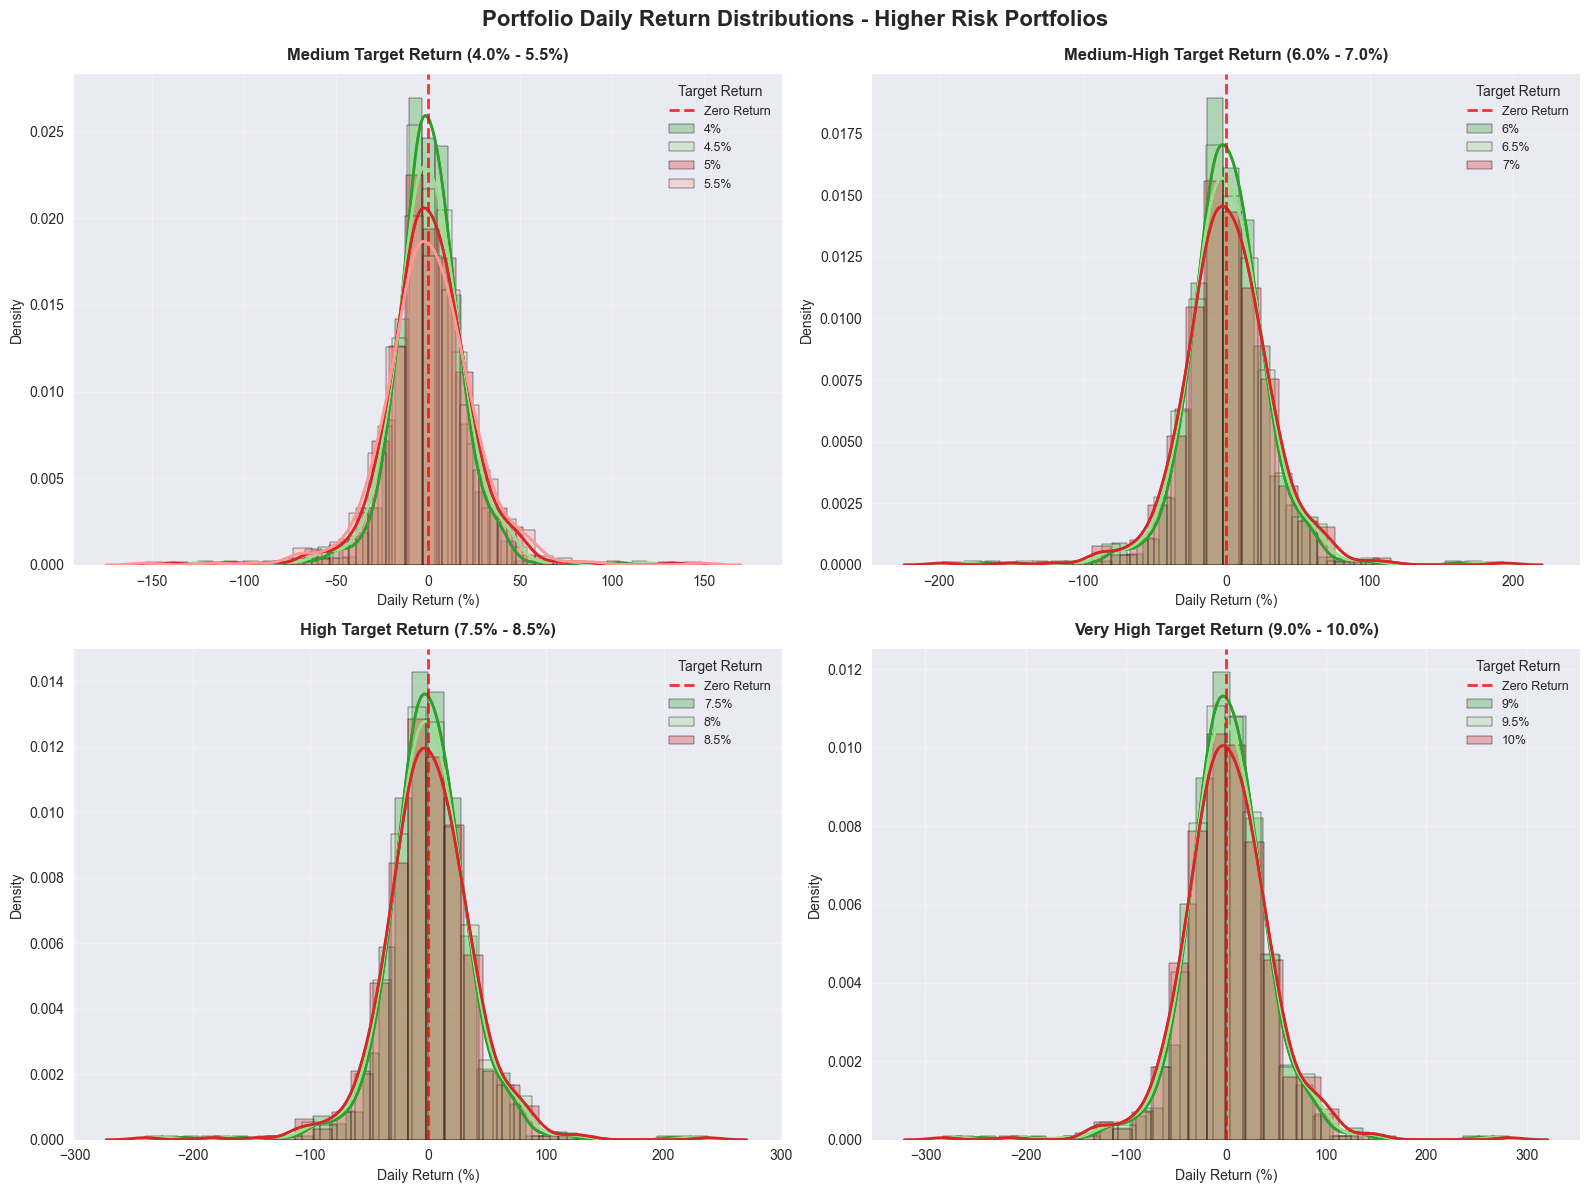

Return Distribution Analysis Summary:
Total portfolios: 21
Days analyzed: 600
Target return range: 0.0% to 10.0%

Diagram 1 (4 distributions × 2 plots):
- Plot 1: 0.0%, 0.5%, 1.0%, 1.5% TR
- Plot 2: 2.0%, 2.5%, 3.0%, 3.5% TR

Diagram 2 (3-4 distributions × 4 plots):
- Plot 1: 4.0%, 4.5%, 5.0%, 5.5% TR (4 distributions)
- Plot 2: 6.0%, 6.5%, 7.0% TR (3 distributions)
- Plot 3: 7.5%, 8.0%, 8.5% TR (3 distributions)
- Plot 4: 9.0%, 9.5%, 10.0% TR (3 distributions)

Statistical Summary (Daily Returns %):
Portfolio | Mean | Std Dev | Min | Max | Skewness | Kurtosis
----------------------------------------------------------------------
     0.0% | 0.14 |   3.45 | -26.1 | 13.0 |   -1.09 |    7.88
     0.5% | 0.20 |   3.83 | -30.3 | 20.1 |   -0.69 |    8.45
       1% | 0.22 |   5.34 | -35.1 | 28.2 |   -0.43 |    5.72
     1.5% | 0.25 |   7.27 | -39.2 | 35.1 |   -0.36 |    4.63
       2% | 0.27 |   9.38 | -53.4 | 44.5 |   -0.31 |    4.61
     2.5% | 0.31 |  11.59 | -67.8 | 59.6 |   -0.28 |    4

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the Excel file
df = pd.read_excel('Port TR Return Distribution.xlsx', sheet_name='Sheet1')

# Convert returns to percentage for better readability
df_pct = df * 100  # Convert to percentage

# Define colors for consistent visualization
colors = plt.cm.tab20(np.linspace(0, 1, 20))

# ========================================
# FIRST DIAGRAM: 4 lines × 2 plots (larger)
# ========================================

fig1, axes1 = plt.subplots(2, 1, figsize=(10, 10))
fig1.suptitle('Portfolio Daily Return Distributions - Low Risk Portfolios', fontsize=18, fontweight='bold', y=0.98)

# First diagram portfolio groupings (4 portfolios per plot)
group1_portfolios = [
    list(range(0, 4)),    # Portfolios 0-3 (0.0% to 1.5% TR)
    list(range(4, 8))     # Portfolios 4-7 (2.0% to 3.5% TR)
]

group1_titles = [
    'Very Low Target Return (0.0% - 1.5%)',
    'Low Target Return (2.0% - 3.5%)'
]

# Plot first diagram
for i, (group, title) in enumerate(zip(group1_portfolios, group1_titles)):
    ax = axes1[i]
    
    for j, portfolio_idx in enumerate(group):
        # Get portfolio name and data
        portfolio_name = df_pct.columns[portfolio_idx]
        portfolio_data = df_pct.iloc[:, portfolio_idx].dropna()
        
        # Extract target return percentage for legend
        tr_percent = portfolio_name.split()[1]
        
        # Create density plot
        color = colors[j]
        sns.histplot(data=portfolio_data, kde=True, stat='density', alpha=0.3, 
                    color=color, label=f'{tr_percent}', ax=ax, bins=40)
        
        # Add KDE curve only
        sns.kdeplot(data=portfolio_data, color=color, linewidth=2.5, ax=ax)
    
    # Add vertical line at 0
    ax.axvline(x=0, color='red', linestyle='--', linewidth=2, alpha=0.8, label='Zero Return')
    
    # Customize subplot
    ax.set_title(title, fontsize=14, fontweight='bold', pad=15)
    ax.set_xlabel('Daily Return (%)', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(title='Target Return', loc='upper right', fontsize=10)
    
    # Center the plot around 0
    max_abs = max(abs(ax.get_xlim()[0]), abs(ax.get_xlim()[1]))
    ax.set_xlim(-max_abs, max_abs)

plt.tight_layout()
plt.show()

# ========================================
# SECOND DIAGRAM: 3-4 lines × 4 plots (smaller)
# ========================================

fig2, axes2 = plt.subplots(2, 2, figsize=(16, 12))
fig2.suptitle('Portfolio Daily Return Distributions - Higher Risk Portfolios', fontsize=16, fontweight='bold', y=0.99)

# Flatten axes for easier indexing
axes2 = axes2.flatten()

# Second diagram portfolio groupings (remaining 13 portfolios: 4,3,3,3)
group2_portfolios = [
    list(range(8, 12)),   # Portfolios 8-11 (4.0% to 5.5% TR)
    list(range(12, 15)),  # Portfolios 12-14 (6.0% to 7.0% TR)
    list(range(15, 18)),  # Portfolios 15-17 (7.5% to 8.5% TR)
    list(range(18, 21))   # Portfolios 18-20 (9.0% to 10.0% TR)
]

group2_titles = [
    'Medium Target Return (4.0% - 5.5%)',
    'Medium-High Target Return (6.0% - 7.0%)',
    'High Target Return (7.5% - 8.5%)',
    'Very High Target Return (9.0% - 10.0%)'
]

# Plot second diagram
for i, (group, title) in enumerate(zip(group2_portfolios, group2_titles)):
    ax = axes2[i]
    
    for j, portfolio_idx in enumerate(group):
        # Get portfolio name and data
        portfolio_name = df_pct.columns[portfolio_idx]
        portfolio_data = df_pct.iloc[:, portfolio_idx].dropna()
        
        # Extract target return percentage for legend
        tr_percent = portfolio_name.split()[1]
        
        # Create density plot
        color = colors[j + 4]  # Offset colors to avoid repetition
        sns.histplot(data=portfolio_data, kde=True, stat='density', alpha=0.3, 
                    color=color, label=f'{tr_percent}', ax=ax, bins=30)
        
        # Add KDE curve only
        sns.kdeplot(data=portfolio_data, color=color, linewidth=2, ax=ax)
    
    # Add vertical line at 0
    ax.axvline(x=0, color='red', linestyle='--', linewidth=2, alpha=0.8, label='Zero Return')
    
    # Customize subplot
    ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('Daily Return (%)', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.legend(title='Target Return', loc='upper right', fontsize=9)
    
    # Center the plot around 0
    max_abs = max(abs(ax.get_xlim()[0]), abs(ax.get_xlim()[1]))
    ax.set_xlim(-max_abs, max_abs)

plt.tight_layout()
plt.show()

# Optional: Save both figures
fig1.savefig('return_distribution_diagram1.png', dpi=300, bbox_inches='tight')
fig2.savefig('return_distribution_diagram2.png', dpi=300, bbox_inches='tight')

print("Return Distribution Analysis Summary:")
print(f"Total portfolios: {len(df.columns)}")
print(f"Days analyzed: {len(df)}")
print(f"Target return range: 0.0% to 10.0%")

print("\nDiagram 1 (4 distributions × 2 plots):")
print("- Plot 1: 0.0%, 0.5%, 1.0%, 1.5% TR")
print("- Plot 2: 2.0%, 2.5%, 3.0%, 3.5% TR")

print("\nDiagram 2 (3-4 distributions × 4 plots):")
print("- Plot 1: 4.0%, 4.5%, 5.0%, 5.5% TR (4 distributions)")
print("- Plot 2: 6.0%, 6.5%, 7.0% TR (3 distributions)")
print("- Plot 3: 7.5%, 8.0%, 8.5% TR (3 distributions)")
print("- Plot 4: 9.0%, 9.5%, 10.0% TR (3 distributions)")

# Display statistical summary for each portfolio
print("\nStatistical Summary (Daily Returns %):")
print("Portfolio | Mean | Std Dev | Min | Max | Skewness | Kurtosis")
print("-" * 70)

for i, col in enumerate(df.columns):
    returns_pct = df_pct.iloc[:, i].dropna()
    tr_percent = col.split()[1]
    
    mean_ret = returns_pct.mean()
    std_ret = returns_pct.std()
    min_ret = returns_pct.min()
    max_ret = returns_pct.max()
    skew_ret = stats.skew(returns_pct)
    kurt_ret = stats.kurtosis(returns_pct)
    
    print(f"{tr_percent:>9} | {mean_ret:>4.2f} | {std_ret:>6.2f} | {min_ret:>4.1f} | {max_ret:>4.1f} | {skew_ret:>7.2f} | {kurt_ret:>7.2f}")

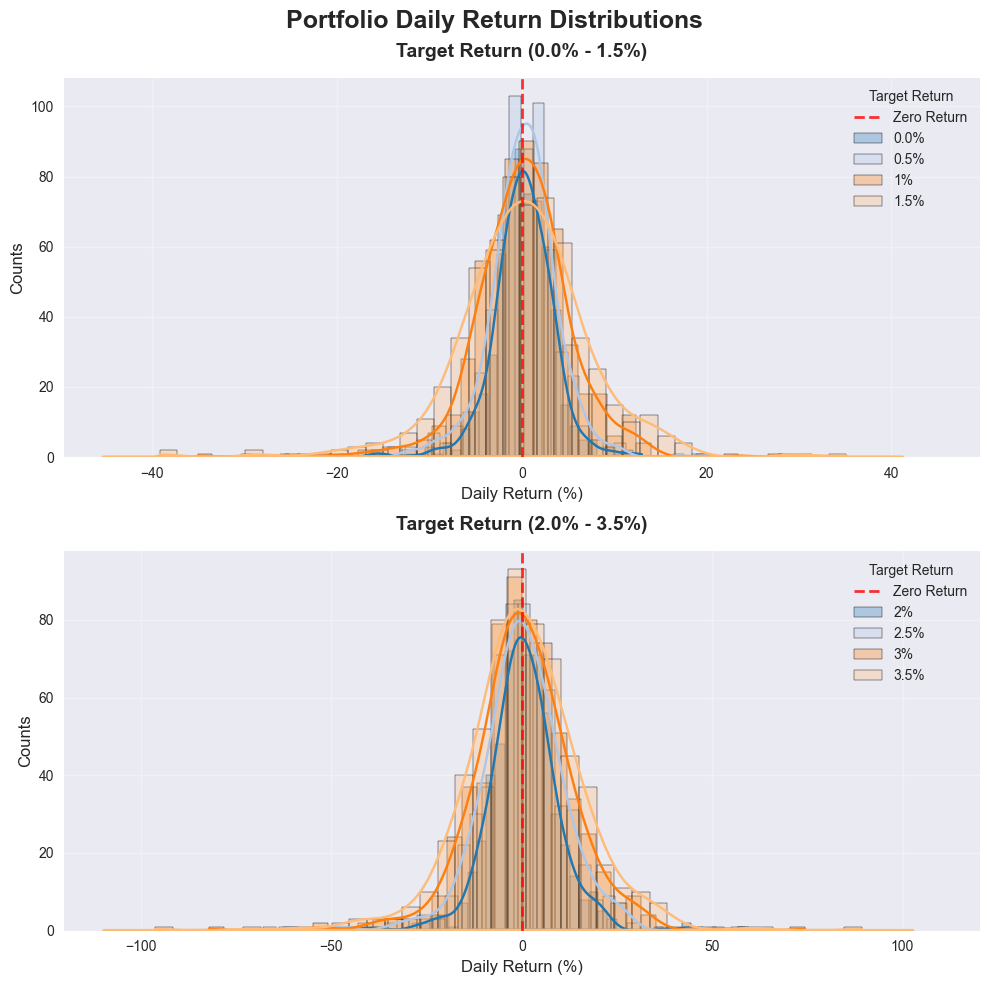

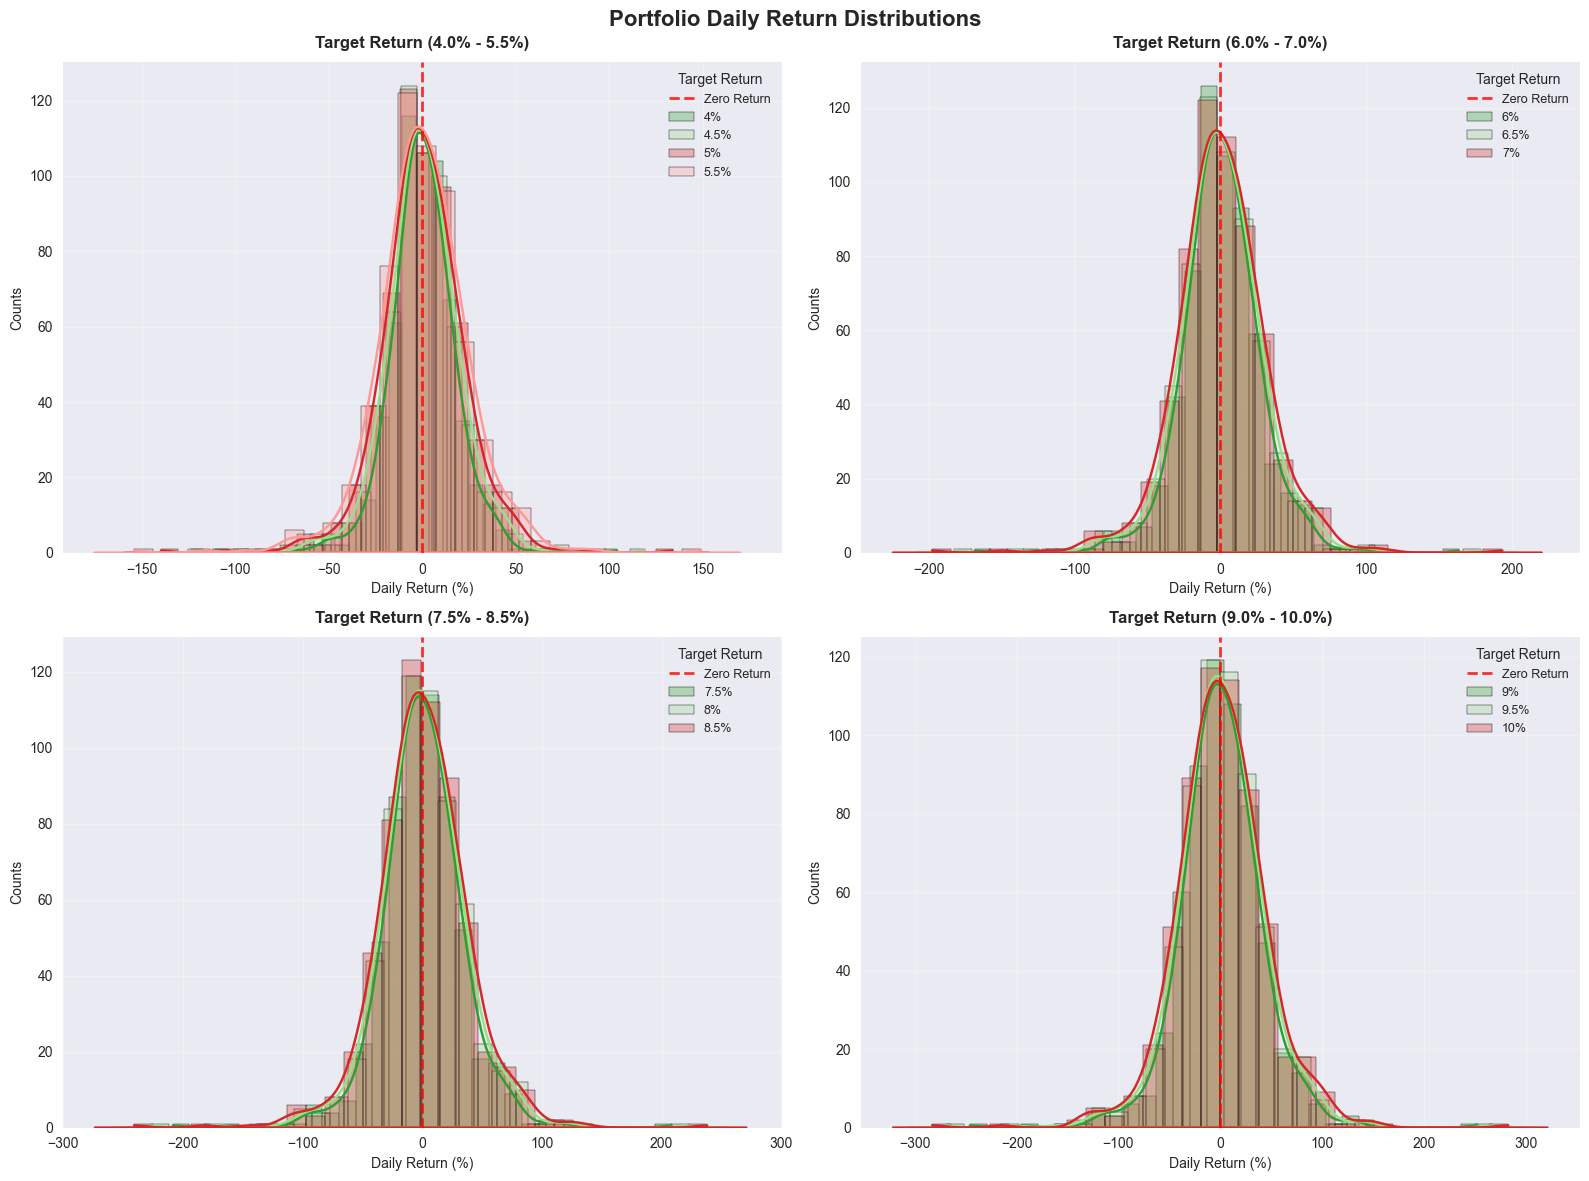

Return Distribution Analysis Summary:
Total portfolios: 21
Days analyzed: 600
Target return range: 0.0% to 10.0%

Diagram 1 (4 distributions × 2 plots):
- Plot 1: 0.0%, 0.5%, 1.0%, 1.5% TR
- Plot 2: 2.0%, 2.5%, 3.0%, 3.5% TR

Diagram 2 (3-4 distributions × 4 plots):
- Plot 1: 4.0%, 4.5%, 5.0%, 5.5% TR (4 distributions)
- Plot 2: 6.0%, 6.5%, 7.0% TR (3 distributions)
- Plot 3: 7.5%, 8.0%, 8.5% TR (3 distributions)
- Plot 4: 9.0%, 9.5%, 10.0% TR (3 distributions)

Statistical Summary (Daily Returns %):
Portfolio | Mean | Std Dev | Min | Max | Skewness | Kurtosis
----------------------------------------------------------------------
     0.0% | 0.14 |   3.45 | -26.1 | 13.0 |   -1.09 |    7.88
     0.5% | 0.20 |   3.83 | -30.3 | 20.1 |   -0.69 |    8.45
       1% | 0.22 |   5.34 | -35.1 | 28.2 |   -0.43 |    5.72
     1.5% | 0.25 |   7.27 | -39.2 | 35.1 |   -0.36 |    4.63
       2% | 0.27 |   9.38 | -53.4 | 44.5 |   -0.31 |    4.61
     2.5% | 0.31 |  11.59 | -67.8 | 59.6 |   -0.28 |    4

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the Excel file
df = pd.read_excel('Port TR Return Distribution.xlsx', sheet_name='Sheet1')

# Convert returns to percentage for better readability
df_pct = df * 100  # Convert to percentage

# Define colors for consistent visualization
colors = plt.cm.tab20(np.linspace(0, 1, 20))

# ========================================
# FIRST DIAGRAM: 4 lines × 2 plots (larger)
# ========================================

fig1, axes1 = plt.subplots(2, 1, figsize=(10, 10))
fig1.suptitle('Portfolio Daily Return Distributions', fontsize=18, fontweight='bold', y=0.98)

# First diagram portfolio groupings (4 portfolios per plot)
group1_portfolios = [
    list(range(0, 4)),    # Portfolios 0-3 (0.0% to 1.5% TR)
    list(range(4, 8))     # Portfolios 4-7 (2.0% to 3.5% TR)
]

group1_titles = [
    'Target Return (0.0% - 1.5%)',
    'Target Return (2.0% - 3.5%)'
]

# Plot first diagram
for i, (group, title) in enumerate(zip(group1_portfolios, group1_titles)):
    ax = axes1[i]
    
    for j, portfolio_idx in enumerate(group):
        # Get portfolio name and data
        portfolio_name = df_pct.columns[portfolio_idx]
        portfolio_data = df_pct.iloc[:, portfolio_idx].dropna()
        
        # Extract target return percentage for legend
        tr_percent = portfolio_name.split()[1]
        
        # Create density plot
        color = colors[j]
        sns.histplot(data=portfolio_data, kde=True, stat='count', alpha=0.3, 
                    color=color, label=f'{tr_percent}', ax=ax, bins=40)
        
        # Add KDE curve only
        sns.kdeplot(data=portfolio_data, color=color, linewidth=2.5, ax=ax)
    
    # Add vertical line at 0
    ax.axvline(x=0, color='red', linestyle='--', linewidth=2, alpha=0.8, label='Zero Return')
    
    # Customize subplot
    ax.set_title(title, fontsize=14, fontweight='bold', pad=15)
    ax.set_xlabel('Daily Return (%)', fontsize=12)
    ax.set_ylabel('Counts', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(title='Target Return', loc='upper right', fontsize=10)
    
    # Center the plot around 0
    max_abs = max(abs(ax.get_xlim()[0]), abs(ax.get_xlim()[1]))
    ax.set_xlim(-max_abs, max_abs)

plt.tight_layout()
plt.show()

# ========================================
# SECOND DIAGRAM: 3-4 lines × 4 plots (smaller)
# ========================================

fig2, axes2 = plt.subplots(2, 2, figsize=(16, 12))
fig2.suptitle('Portfolio Daily Return Distributions', fontsize=16, fontweight='bold', y=0.98)

# Flatten axes for easier indexing
axes2 = axes2.flatten()

# Second diagram portfolio groupings (remaining 13 portfolios: 4,3,3,3)
group2_portfolios = [
    list(range(8, 12)),   # Portfolios 8-11 (4.0% to 5.5% TR)
    list(range(12, 15)),  # Portfolios 12-14 (6.0% to 7.0% TR)
    list(range(15, 18)),  # Portfolios 15-17 (7.5% to 8.5% TR)
    list(range(18, 21))   # Portfolios 18-20 (9.0% to 10.0% TR)
]

group2_titles = [
    'Target Return (4.0% - 5.5%)',
    'Target Return (6.0% - 7.0%)',
    'Target Return (7.5% - 8.5%)',
    'Target Return (9.0% - 10.0%)'
]

# Plot second diagram
for i, (group, title) in enumerate(zip(group2_portfolios, group2_titles)):
    ax = axes2[i]
    
    for j, portfolio_idx in enumerate(group):
        # Get portfolio name and data
        portfolio_name = df_pct.columns[portfolio_idx]
        portfolio_data = df_pct.iloc[:, portfolio_idx].dropna()
        
        # Extract target return percentage for legend
        tr_percent = portfolio_name.split()[1]
        
        # Create density plot
        color = colors[j + 4]  # Offset colors to avoid repetition
        sns.histplot(data=portfolio_data, kde=True, stat='count', alpha=0.3, 
                    color=color, label=f'{tr_percent}', ax=ax, bins=30)
        
        # Add KDE curve only
        sns.kdeplot(data=portfolio_data, color=color, linewidth=2, ax=ax)
    
    # Add vertical line at 0
    ax.axvline(x=0, color='red', linestyle='--', linewidth=2, alpha=0.8, label='Zero Return')
    
    # Customize subplot
    ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('Daily Return (%)', fontsize=10)
    ax.set_ylabel('Counts', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.legend(title='Target Return', loc='upper right', fontsize=9)
    
    # Center the plot around 0
    max_abs = max(abs(ax.get_xlim()[0]), abs(ax.get_xlim()[1]))
    ax.set_xlim(-max_abs, max_abs)

plt.tight_layout()
plt.show()

# Optional: Save both figures
fig1.savefig('return_distribution_diagram1.png', dpi=300, bbox_inches='tight')
fig2.savefig('return_distribution_diagram2.png', dpi=300, bbox_inches='tight')

print("Return Distribution Analysis Summary:")
print(f"Total portfolios: {len(df.columns)}")
print(f"Days analyzed: {len(df)}")
print(f"Target return range: 0.0% to 10.0%")

print("\nDiagram 1 (4 distributions × 2 plots):")
print("- Plot 1: 0.0%, 0.5%, 1.0%, 1.5% TR")
print("- Plot 2: 2.0%, 2.5%, 3.0%, 3.5% TR")

print("\nDiagram 2 (3-4 distributions × 4 plots):")
print("- Plot 1: 4.0%, 4.5%, 5.0%, 5.5% TR (4 distributions)")
print("- Plot 2: 6.0%, 6.5%, 7.0% TR (3 distributions)")
print("- Plot 3: 7.5%, 8.0%, 8.5% TR (3 distributions)")
print("- Plot 4: 9.0%, 9.5%, 10.0% TR (3 distributions)")

# Display statistical summary for each portfolio
print("\nStatistical Summary (Daily Returns %):")
print("Portfolio | Mean | Std Dev | Min | Max | Skewness | Kurtosis")
print("-" * 70)

for i, col in enumerate(df.columns):
    returns_pct = df_pct.iloc[:, i].dropna()
    tr_percent = col.split()[1]
    
    mean_ret = returns_pct.mean()
    std_ret = returns_pct.std()
    min_ret = returns_pct.min()
    max_ret = returns_pct.max()
    skew_ret = stats.skew(returns_pct)
    kurt_ret = stats.kurtosis(returns_pct)
    
    print(f"{tr_percent:>9} | {mean_ret:>4.2f} | {std_ret:>6.2f} | {min_ret:>4.1f} | {max_ret:>4.1f} | {skew_ret:>7.2f} | {kurt_ret:>7.2f}")